In [1]:
from numpy import *
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

Part 1: Matrix - Vector multiplication function

In [2]:
# we check sizes of the input Matrix and the Vector before the multiplicaiton 

# Mat-Vec multiplication function
# theoretical number of FLOPS is O(n^2)
def mat_vec_mult(matr, vect):
    matr_rows = shape(matr)[0]
    matr_columns = shape(matr)[1]
    vect_size = shape(vect)[0]
    
    # checking if multiplication of the matrix and the vector is possible
    if matr_columns == vect_size:
        print('YES, multiplication is possible')
    else:
        print('NO, multiplication is not possible')
        return

    # creating a vector for saving the multiplication result
    result = np.empty([matr_rows])

    # 1st loop - through the matrix rows
    for i in range (matr_rows):
        #print('i = %d' % (i) )
        temp = 0

        # 2nd loop - through the vector
        for j in range (vect_size):
            temp = temp + matr[i,j]*vect[j]
  
        result[i] = temp
    
    #print('total result = ', result)
    #print('toral result shape = ', shape(result))
    return result

In [3]:
# Verification and Time Measurements (in one loop)

from traitlets.config.application import T

N_arr = np.array([40, 80, 160, 320, 640, 1280, 2560]) # list of sizes for Mat and Vec

time_list = [] #empty list for saving times, needed for a multiplication
for N in N_arr: 
    A = np.random.rand(N,N)   # generating random matrix
    b = np.random.rand(N)     # generating random vector
    t_start = time.time()     # reading system time before the multiplication
    x = mat_vec_mult(A,b)     # Mat-Vec multiplication 
    t_end = time.time()       # reading system time when multiplication is done
    #print ('time spent = ', t_end - t_start)   

    # Verification part
    result_true = A@b    # result with Python @ operator
    diff = np.linalg.norm(x - result_true)  # difference betwen Mat-Vec and @ results
    print(diff)
    assert(diff < 1e-12*N)

    time_list.append(t_end - t_start)   # adding a delay for a part. multiplication to list

#print(time_list)

YES, multiplication is possible
1.3053503572900977e-14
YES, multiplication is possible
5.399657309215891e-14
YES, multiplication is possible
1.8812616950290428e-13
YES, multiplication is possible
8.91554187851291e-13
YES, multiplication is possible
3.173064609871486e-12
YES, multiplication is possible
1.241817309850042e-11
YES, multiplication is possible
4.768522548774473e-11


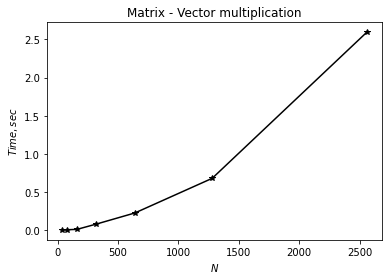

In [4]:
# Time Plot 
plt.plot(N_arr, time_list, 'k-*', label = 'Observed')
plt.title('Matrix - Vector multiplication')
plt.xlabel('$N$')
plt.ylabel('$Time, sec$')
plt.show()

Part-2: Matrix - Matrix multiplication function

In [2]:
# we check sizes of the two Matrixes before the multiplication 
 
# Mat-Mat multiplication function
# theoretical number of FLOPS is O(n^3)
def mat_mat_mult(matr_1, matr_2):

    matr_1_rows = shape(matr_1)[0]
    matr_1_columns = shape(matr_1)[1]
    #print('matr_1 rows = %d, columns = %d' % (matr_1_rows, matr_1_columns) )

    matr_2_rows = shape(matr_2)[0]
    matr_2_columns = shape(matr_2)[1]
    #print('matr_2 rows = %d, columns = %d' % (matr_2_rows, matr_2_columns) )
    
    # check if multiplication of two matrixes is possible
    if matr_1_columns == matr_2_rows:
        print('YES, multiplication of matrices is possible')
    else:
        print('NO, multiplication of matrices is not possible')
        return

    # creating a matrix for saving the multiplication result
    # result size is determined by the outside dimensions of 2 matrixes
    result = np.empty([matr_1_rows, matr_2_columns])
    #print('result shape =', shape(result))

    # init every element of the result matrix to 0 
    #print('init result elements to 0:')
    for i in range (matr_1_rows):
        for j in range (matr_2_columns):
            result[i,j] = 0
            #print('result[%d,%d] = %d' % (i, j, result[i,j]) )
          
    #print('-------')

    # 3 nested loops
    # 1st - looping through the rows of matrix 1
    for i in range (matr_1_rows): 
        # 2nd - looping through the columns of matrix 2
        for j in range (matr_2_columns):
            # now we need to sum up all the small products
            # we don't know how many products we will have: 2, 3, etc.
            # 3rd - looping through the small products
            for k in range (matr_1_columns): # or matr_2_rows
                result[i,j] = result[i,j] + matr_1[i, k] * matr_2[ k, j]
                #print('result[%d,%d]=%d' % ( i, j, result[i,j]) )

    #print('result of multiplication:')
    #print(result)
    return result

In [3]:
# Verification and Time Measurements (in one loop)

from traitlets.config.application import T

time_list = [] #empty list for saving times, needed for a multiplication

N_arr = np.array([40, 50, 60, 70, 80, 90, 100, 120, 140]) # list of sizes for Mat
for N in N_arr:
    A = np.random.rand(N,N)
    B = np.random.rand(N,N)
    t_start = time.time()     # reading system time before the multiplication
    x = mat_mat_mult(A,B)     # Mat-Vec multiplication 
    t_end = time.time()       # readint system time after the multiplication
    #print('time spent = ', t_end - t_start)
    time_list.append(t_end - t_start)   # adding a delay for a part. multiplication to list
    
    # Verification part
    result_true = A@B    # result with Python @ operator
    diff = np.linalg.norm(x - result_true)  # difference betwen Mat-Mat and @ results
    print(diff)
    assert(diff < 1e-12*N)

#print('time spent = ', t_end - t_start)
#print(time_list)

YES, multiplication of matrices is possible
4.112563410810646e-14
YES, multiplication of matrices is possible
5.81604295168777e-14
YES, multiplication of matrices is possible
8.678734886520166e-14
YES, multiplication of matrices is possible
1.304020156015394e-13
YES, multiplication of matrices is possible
1.6077746776921858e-13
YES, multiplication of matrices is possible
2.2066899636669083e-13
YES, multiplication of matrices is possible
2.761535106232142e-13
YES, multiplication of matrices is possible
3.388886631708057e-13
YES, multiplication of matrices is possible
5.8139809291361e-13


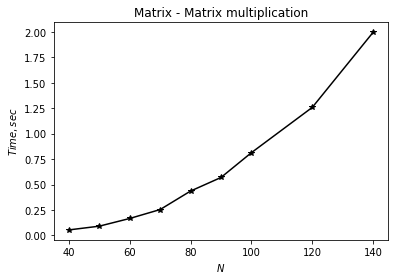

In [4]:
# Time Plot
plt.plot(N_arr, time_list, 'k-*', label = 'Observed')
plt.title('Matrix - Matrix multiplication')
plt.xlabel('$N$')
plt.ylabel('$Time, sec$')
plt.show()